# 0. Introduction
NIH released the chest X-ray [dataset](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community)
Files are extracted in the **'data'** and and the images are extracted in the **'images'** folders.


In [14]:
# # Download the 56 zip files in Images_png in batches
# import urllib

# # URLs for the zip files
# links = [
#     'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
#     'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
#     'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
#     'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#     'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
#     'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
#     'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#     'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
#     'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
#     'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
#     'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
#     'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
# ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading', fn, '...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file
# print("Download complete. Please check the checksums")

## Loading Prerequisites and Libraries 

Standard Imports:  
Plotly is configured to run in the offline mode.  
Pandas is chosen to for manipulating csv files.  
Numpy is for the arithmetic applications.

Visualizations:  
Most of the visualizations are done via matplotlib, seaborn and plotly.   

Custom Functions:  
All additional functions and code are written and imported from the **eda_xray.py** file.

In [31]:
import shutil
import os
from eda_xray import load_xray
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # sets up plotting under plt
import matplotlib.cm as cm  # allows us easy access to colormaps
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
import plotly_express as px
import plotly.graph_objs as go
import plotly.offline
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
%load_ext autoreload
%autoreload 2
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 5)
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ColorPicker(value='blue', description='Pick a color')

There is a total of 112120 images on the NIH dataset.

In [3]:
# creating image location and looking for the number of the images
img_location = 'data/images'
imgs = [file for file in os.listdir(img_location) if file.endswith('.png')]
len(imgs)

112120

## Importing data and renaming/dropping columns

The function **load_xray** does the following:
1. imports the css
2. renames the columns to lower letter
3. drops the last empty column
4. adds a new columns caled **'path'** that has the x-rays *image*.png* location

In [57]:
data = 'data/Data_Entry_2017.csv'
df = load_xray(data)
df.sample(5)

,imgindex,label,followup,patientID,age,gender,viewposition,width,height,x,y,path
111069,00030320_006.png,Infiltration,6,30320,6,F,AP,2544,3056,0.139,0.139,data/images/00030320_006.png
100201,00026554_003.png,Edema|Infiltration,3,26554,16,F,AP,3056,2544,0.139,0.139,data/images/00026554_003.png
5184,00001381_006.png,No Finding,6,1381,45,M,AP,2500,2048,0.168,0.168,data/images/00001381_006.png
62910,00015556_018.png,Infiltration|Nodule,18,15556,56,M,PA,2992,2991,0.143,0.143,data/images/00015556_018.png
75919,00018619_000.png,No Finding,0,18619,57,F,PA,2578,2621,0.143,0.143,data/images/00018619_000.png


In [58]:
# df.age.describe()
# df[df.age > df.age.quantile(0.997)]
# df[df.age > 100]
# sns.distplot(df.age[df.age > df.age.quantile(0.997)], kde = False)

There are 836 different combinations of labeling among the x-rays.

## Unique pathologies of x-ray abnormalities and choosing a subset

There 836 unique values in the labels and these values have several different groupings of the pathologies. 

In [59]:
df.label.nunique()

836

If we don't the consider the multilabel abnormalities, we'd have 14 labels plus the *'No Finding'* classification.

Infiltration          9547
Atelectasis           4215
Effusion              3955
Nodule                2705
Pneumothorax          2194
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Emphysema              892
Fibrosis               727
Edema                  628
Pneumonia              322
Hernia                 110
Name: label, dtype: int64


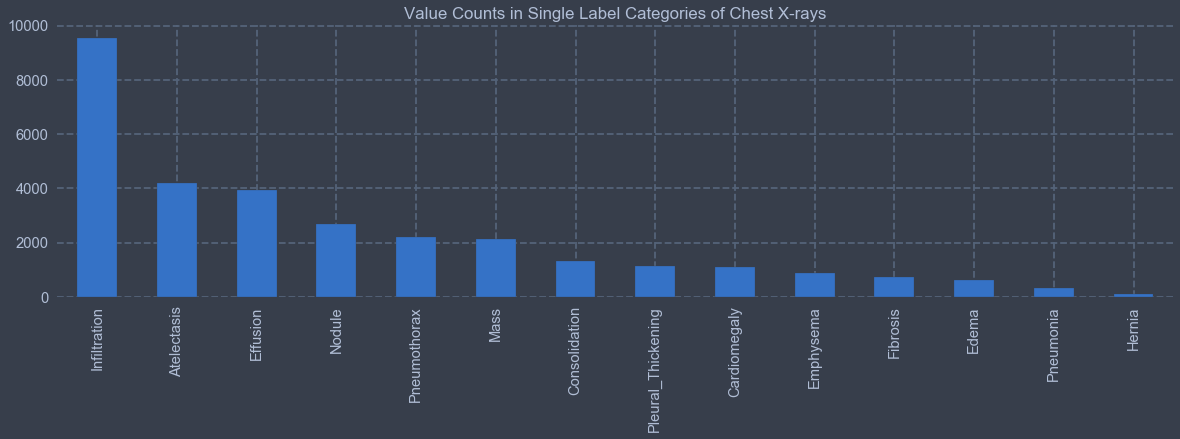

In [60]:
single_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax',
                 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
                 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']
print(df[df.label.isin(single_labels)].label.value_counts())

df[df.label.isin(single_labels)].label.value_counts().plot(kind='bar',
                                                           figsize=(20, 5),
                                                           title='Value Counts in Single Label Categories of Chest X-rays');

By Looking at the dataset we can see there's more than 60,000 values for the *'No Finding'* label.
To have a subset we randomly sample 10,000 values of this label and concat with the other single labels.

In [61]:
df_subset = pd.concat((df[df.label == 'No Finding'].sample(10000, random_state=42),
                       df[df.label.isin(single_labels)]))

No Finding            10000
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: label, dtype: int64


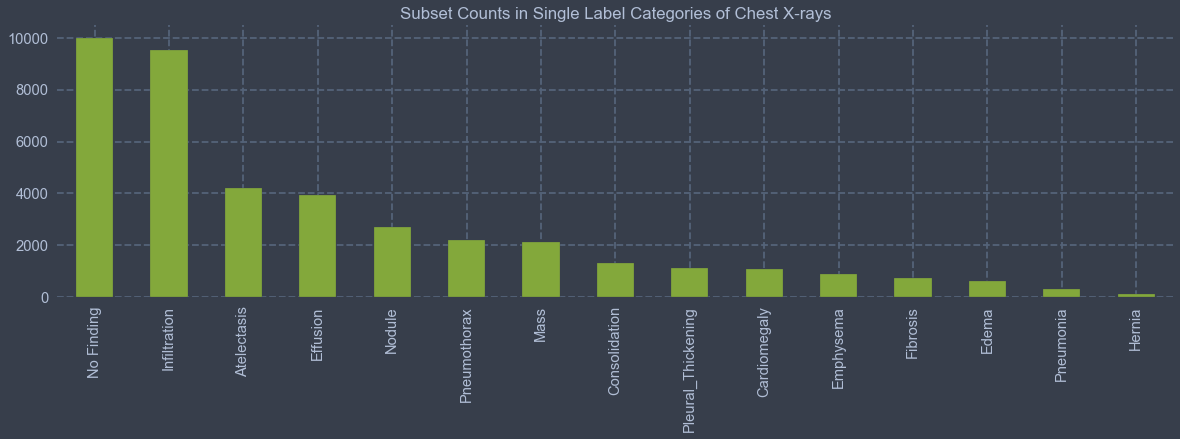

In [62]:
print(df_subset.label.value_counts())
df_subset.label.value_counts().plot(kind='bar',
                                    figsize=(20, 5),
                                    color='g',
                                    title='Subset Counts in Single Label Categories of Chest X-rays');

The created subset has a total of 40963 values, which close to a third of the original dataset. Thus in total we have chosen **%36.53** of the original dataframe. 

In [63]:
print('# of rows in the subset dataframe: ', df_subset.shape[0])
print('\n# of rows in the original dataframe: ', df.shape[0])
print('\npercentage subset of the original: ',
      df_subset.shape[0]/df.shape[0]*100)

# of rows in the subset dataframe:  40963

# of rows in the original dataframe:  112120

percentage subset of the original:  36.53496254013557


## Creating Categorical Variables

In [73]:
#create 
df_subset = pd.get_dummies(df_subset,
                           columns=['label'],
                           prefix='',
                           prefix_sep='',
                           dtype=np.float64)

In [79]:
df_subset['target'] = df_subset.apply(lambda x: [x[single_labels].values], 1).map(lambda x: x[0])

## Output to CSV & Pickle & HD5

In [89]:
# overwriting the df variable name with the df_subset for convention
df = df_subset

## Split train, validation, and test data

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

# quick check to see that the training and test set were split properly
print('training set - # of observations: ', len(train_set))
print('test set - # of observations): ', len(test_set))
print('prior, full data set - # of observations): ', len(xray_data))




## CLAHE - Contrast Limited Adaptive Histogram Equalization  

We apply the CLAHE [(Contrast Limited Adaptive Histogram Equalization)](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization) method, which is a popular image processing method to improve contrast in images and limit the noise amplification of the regular adaptive method.


In [26]:
# read and equalize images
from cv2 import imread, imwrite, imshow,  createCLAHE, equalizeHist
import numpy as np

## Checking for contrast normality

In [27]:
# need a function that takes 9 images, shows them, plots the histogram on the left, shows the equalized pic,
# shows the hisotgram on the righ

In [28]:
# for path in df.sample(12, random_state=42).path.values:
#     img = imread(path, 0)
#     hist, bins = np.histogram(img.flatten(), 256, [0, 256])
#     cdf = hist.cumsum()
#     cdf_normalized = cdf * float(hist.max()) / cdf.max()
#     plt.plot(cdf_normalized, color='b')
#     plt.hist(img.flatten(), 256, [0, 256], color='r')
#     plt.xlim([0, 256])
#     plt.legend(('cdf', 'histogram'), loc='upper left')
#     plt.show();

In [29]:
# hist,bins = np.histogram(img2.flatten(),256,[0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(img2.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.show()

## Applying CLAHE 

In [ ]:
# why apply mean  , 2 and also why astype(np.uint8)
from skimage.transform import resize
output_dimension = (128, 128)
def apply_CLAHE(path):
    """
    This function takes the path of the image and applies the CLAHE technique.
    Outputs the new image.
    """
    clahe_tool = createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_data = np.mean(imread(path), 2).astype(np.uint8)
    img_data = clahe_tool.apply(img_data)
    n_img = (255*resize(img_data, output_dimension, mode = 'constant')).clip(0,255).astype(np.uint8)
    return np.expand_dims(n_img, -1)

test_img = apply_CLAHE(df['path'].values[0])
plt.matshow(test_img[:,:,0])

In [41]:
np.uint8

numpy.uint8

In [43]:
import tensorflow as tf
tf.keras.preprocessing.image
img = load_img(df['path'].values[0])
# img_to_array(img)

ModuleNotFoundError: No module named 'keras'

In [39]:
imread(df['path'].values[0])
imread(df['path'].values[0]).shape

array([[[253, 253, 253],
        [227, 227, 227],
        [139, 139, 139],
        ...,
        [119, 119, 119],
        [119, 119, 119],
        [119, 119, 119]],

       [[247, 247, 247],
        [175, 175, 175],
        [ 93,  93,  93],
        ...,
        [118, 118, 118],
        [117, 117, 117],
        [117, 117, 117]],

       [[196, 196, 196],
        [ 94,  94,  94],
        [ 61,  61,  61],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [107, 107, 107]],

       ...,

       [[233, 233, 233],
        [229, 229, 229],
        [227, 227, 227],
        ...,
        [154, 154, 154],
        [154, 154, 154],
        [154, 154, 154]],

       [[237, 237, 237],
        [230, 230, 230],
        [228, 228, 228],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [160, 160, 160]],

       [[243, 243, 243],
        [235, 235, 235],
        [230, 230, 230],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [168, 168, 168]]

(1024, 1024, 3)

(1024, 1024, 3)

In [3]:
# model = Sequential()
# model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling)
# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling)
# model.add(Convolution2D(62, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling)
# model.add(Flatten())
# model.add(Dense(64))
# model.aa(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))  # or softmax?
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop', metrics='accuracy')
# # backward propagating based on loss function
# model.fit(.....)


# train_datagen = ImageDataGenerator(
#     rotation_range=15,
#     rescale=1./255,
#     shear_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
# )

# train_generator = train_datagen.flow_from_dataframe(
#     train_df,
#     "../input/train/train/",
#     x_col='filename',
#     y_col='category',
#     target_size=IMAGE_SIZE,
#     class_mode='categorical',
#     batch_size=batch_size
# )


# # classic CNN looks like this:
# # input>conv>reLU>conv>reLU>pool>relu>conv>pool>fullyconnected
# # common technique to avoid overfitting is to use dropout filters. it uses a random set of activation filters
# # by settin ghtme to 0 as data flows through


# # pooling reduces the dimensionality of each feature map but keeps the largest feature
# # reLU replace all negative values with zero

# # our filter is our feature identifier or basically the weights we assign

# # all you have to do is to create a small filter and convert it to an array

In [11]:
!jt -t onedork -N -T -kl -f roboto -fs 115 -cursc r -cursw 4 -ofs 115 -cellw 100% -altp -m 200

In [ ]:
3//1

[autoreload of tensorflow._api failed: Traceback (most recent call last):
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\yasha\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\yasha\Anaconda3\lib\importlib\__init__.py", line 142, in reload
    name = module.__spec__.name
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 45, in _load
    self._parent_module_globals[self._local_name] = module
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\

[autoreload of tensorflow.keras failed: Traceback (most recent call last):
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\yasha\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\yasha\Anaconda3\lib\importlib\__init__.py", line 142, in reload
    name = module.__spec__.name
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 45, in _load
    self._parent_module_globals[self._local_name] = module
  File "C:\Users\yasha\Anaconda3\lib\site-packages\tensorflow\__init__.py", line 50, in __getattr__
    module = self._load()
  File "C:\Users

[autoreload of tensorflow.python.framework.device_spec failed: Traceback (most recent call last):
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "C:\Users\yasha\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: 'DeviceSpecV1' object layout differs from 'DeviceSpecV1'
]


In [1]:
!jt -t onedork -N -T -kl -f roboto -fs 115 -cursc r -cursw 4 -ofs 115 -cellw 100% -altp -m 200

In [ ]:
# create validation set from the training set.


# make sure to batch normalize & renormalize across all the inputs

# smaller batch size (32) leads to much better results